In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def flat_panel_geo(bp, T, delta, c_r, c_t, m, n, i, j):
    dy = bp/n
    
    # A-B=forward segment
    # C-D=rear segment
    # A and C are on the same chord, idem B and D. Clockwise sequence: ABDC
    y_A = -bp/2 + j*dy
    y_B = y_A + dy
    y_C, y_D = y_A, y_B

    y_pc = y_A + dy/2
    
    # slope of the quarter chord line
    p = np.tan(T)
    
    # r,s,q are the X coordinates of the quarter chord line for y_A, y_B and y_pc respectively
    ch_025 = lambda y: c_r/4 + p*abs(y)
    r = ch_025(y_A)
    s = ch_025(y_B)
    q = ch_025(y_pc)

    # chord law evaluation
    ch_y = lambda y: c_r + (c_t - c_r)*abs(2*y/bp) 
    c_AC = ch_y(y_A)
    c_BD = ch_y(y_B)
    c_PC = ch_y(y_pc)

    # division of the chord in m equal panels
    dx_AC = c_AC/m
    dx_BD = c_BD/m
    dx_PC = c_PC/m
    x_A = (r - c_AC/4) + i*dx_AC
    x_B = (s - c_BD/4) + i*dx_BD
    x_pc = (q - c_PC/4) + (i + 3/4)*dx_PC
    
    # the first term in brackets in the expressions of xA, xB and XPC is the x
    # coordinate of the leading edge of the chord that corresponds to yA, yB
    # and yPC respectively, defined by means of the quarter chord line
    x_C = x_A + dx_AC
    x_D = x_B + dx_BD
    
    x = np.array([x_A,x_B,x_D,x_C])
    y = np.array([y_A,y_B,y_D,y_C])
    z = np.tan(delta)*np.abs(y)
    
    return x, y, z

In [8]:
bp = 30
m, n = 3, 10
T = 20*np.pi/180
delta = 10*np.pi/180
c_r, c_t = 10, 6

In [10]:
X = np.empty((m,n,4))
Y = np.empty((m,n,4))
Z = np.empty((m,n,4))
for i in range(m):
    for j in range(n):
        X[i,j,:], Y[i,j,:], Z[i,j,:] = flat_panel_geo(bp,T,delta,c_r,c_t,m,n,i,j)

In [14]:
from mpl_toolkits.mplot3d import Axes3D

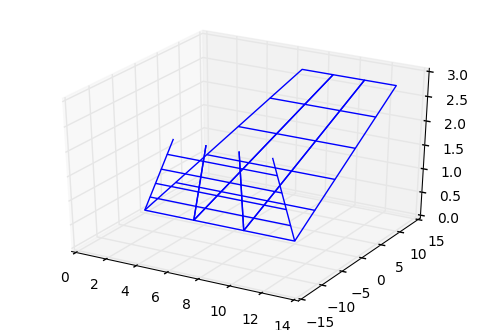

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(m):
    for j in range(n):
        ax.plot_wireframe(X[i,j],Y[i,j],Z[i,j])
plt.show()